NYC COLLISION 

New York City (NYC), with its bustling streets, diverse modes of transportation, and a population constantly on the move, presents a unique and complex landscape for urban mobility. The analysis of NYC accidents data offers a profound insight into the dynamics of safety within this metropolitan environment. This topic was chosen for its significance in understanding the patterns, trends, and contributing factors behind accidents in one of the world's most iconic cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import datasets

In [2]:
df = pd.read_csv(r'C:\Users\Shrushti\Desktop\datasets excel\NYC_Collisions.csv')

Descriptive Statistics

In [34]:
df.describe()

,Collision ID,Latitude,Longitude,Persons Injured,Persons Killed,Pedestrians Injured,Pedestrians Killed,Cyclists Injured,Cyclists Killed,Motorists Injured,Motorists Killed,Month,Year
count,2.296370e+05,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000,229637.000000
mean,4.500385e+06,40.724559,-73.916495,0.483851,0.002608,0.076525,0.001167,0.046443,0.000192,0.339579,0.001106,6.187796,2021.636365
std,6.890930e+04,0.081776,0.084171,0.803607,0.052934,0.281773,0.034397,0.213850,0.013841,0.774046,0.035642,3.455891,0.658493
min,4.073803e+06,40.499710,-74.254960,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2021.000000
25%,4.440711e+06,40.666405,-73.962860,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2021.000000
50%,4.500251e+06,40.714813,-73.920525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2022.000000
75%,4.560075e+06,40.784153,-73.868380,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,2022.000000
max,4.619988e+06,40.912884,-73.700610,40.000000,3.000000,19.000000,2.000000,3.000000,1.000000,40.000000,3.000000,12.000000,2023.000000


Cleaning data

In [10]:
df.isnull().sum()

Collision ID                0
Date                        0
Time                        0
Borough                  7197
Street Name               363
Cross Street           127130
Latitude                22323
Longitude               22323
Contributing Factor      1287
Vehicle Type                0
Persons Injured             1
Persons Killed              0
Pedestrians Injured         0
Pedestrians Killed          0
Cyclists Injured            0
Cyclists Killed             0
Motorists Injured           0
Motorists Killed            0
dtype: int64

In [11]:
df.isnull().sum() / len(df) * 100


Collision ID            0.000000
Date                    0.000000
Time                    0.000000
Borough                 3.018610
Street Name             0.152252
Cross Street           53.321645
Latitude                9.362850
Longitude               9.362850
Contributing Factor     0.539801
Vehicle Type            0.000000
Persons Injured         0.000419
Persons Killed          0.000000
Pedestrians Injured     0.000000
Pedestrians Killed      0.000000
Cyclists Injured        0.000000
Cyclists Killed         0.000000
Motorists Injured       0.000000
Motorists Killed        0.000000
dtype: float64

In [28]:
df.dropna(subset=['Borough', 'Street Name', 'Contributing Factor', 'Persons Injured'], how='any', inplace=True)
df['Latitude'].fillna(method='bfill', inplace=True)
df['Longitude'].fillna(method='bfill', inplace=True)
df['Cross Street'].fillna('Not Specified', inplace = True)

In [29]:
df.isnull().sum()

Collision ID           0
Date                   0
Time                   0
Borough                0
Street Name            0
Cross Street           0
Latitude               0
Longitude              0
Contributing Factor    0
Vehicle Type           0
Persons Injured        0
Persons Killed         0
Pedestrians Injured    0
Pedestrians Killed     0
Cyclists Injured       0
Cyclists Killed        0
Motorists Injured      0
Motorists Killed       0
dtype: int64

Explorative Data Analysis

Analysis Based on Time

In [ ]:
#Display when and how often accidents happen in different boroughs throughout the day

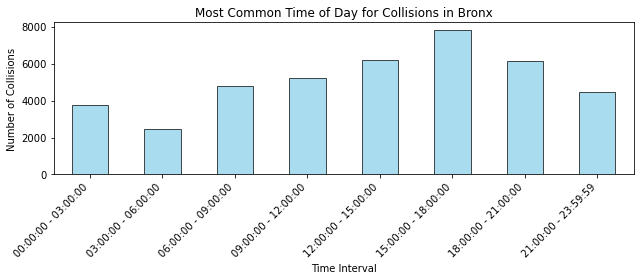

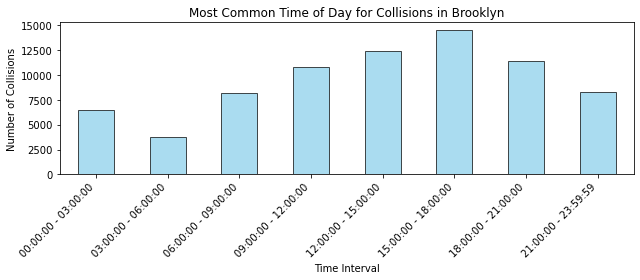

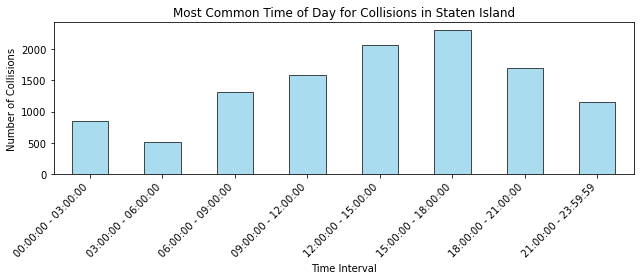

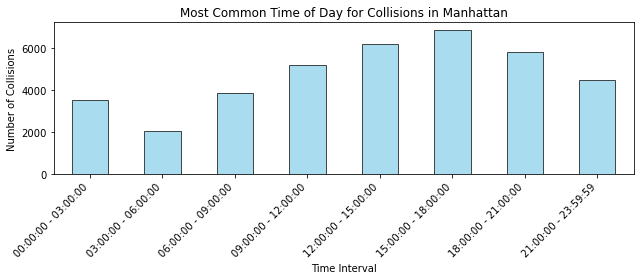

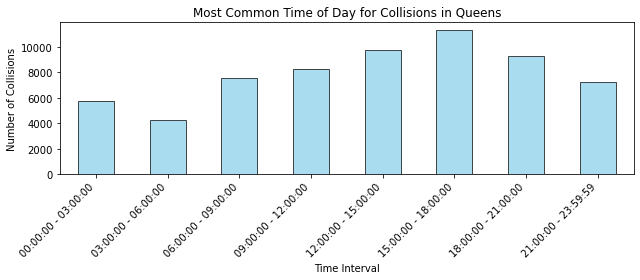

In [47]:
from datetime import datetime

df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

# Define a custom function to categorize time intervals
def categorize_time_interval(time):
    if time < datetime.strptime('03:00:00', '%H:%M:%S').time():
        return '00:00:00 - 03:00:00'
    elif time < datetime.strptime('06:00:00', '%H:%M:%S').time():
        return '03:00:00 - 06:00:00'
    elif time < datetime.strptime('09:00:00', '%H:%M:%S').time():
        return '06:00:00 - 09:00:00'
    elif time < datetime.strptime('12:00:00', '%H:%M:%S').time():
        return '09:00:00 - 12:00:00'
    elif time < datetime.strptime('15:00:00', '%H:%M:%S').time():
        return '12:00:00 - 15:00:00'
    elif time < datetime.strptime('18:00:00', '%H:%M:%S').time():
        return '15:00:00 - 18:00:00'
    elif time < datetime.strptime('21:00:00', '%H:%M:%S').time():
        return '18:00:00 - 21:00:00'
    else:
        return '21:00:00 - 23:59:59'

# Create a new column 'Time Interval' and assign each time to the respective interval
df['Time Interval'] = df['Time'].dt.time.apply(categorize_time_interval)


# Plotting bar charts for each borough and time interval
boroughs = df['Borough'].unique()

for borough in boroughs:
    borough_data = df[df['Borough'] == borough]
    
    
    plt.figure(figsize=(9, 4))
    borough_data.groupby('Time Interval').size().plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
    plt.title(f'Most Common Time of Day for Collisions in {borough}')
    plt.xlabel('Time Interval')
    plt.ylabel('Number of Collisions')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
# Save the plot as an image file
plt.savefig(f'{borough}_collisions_time_of_day.png')
    
plt.tight_layout()
plt.show()

This analysis delves into the accident dynamics across New York City boroughs, exploring the timing and frequency of incidents throughout the day to unveil patterns and improve urban safety. Notably, Brooklyn consistently records a higher overall number of accidents compared to other boroughs. The observed trend across all boroughs reveals a common pattern – minimal accidents before 6 am, a gradual increase leading to a peak between 3 pm and 6 pm, followed by a gradual decline. This understanding offers valuable insights for crafting strategies to enhance safety during peak hours across the diverse boroughs of the city.


In [ ]:
#Analysis of Monthly Accident Trends Across Boroughs: How Does the Frequency of Accidents Vary Throughout the Year
#in Different Boroughs?

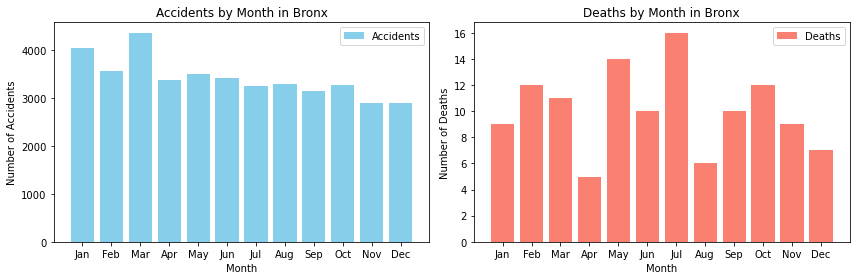

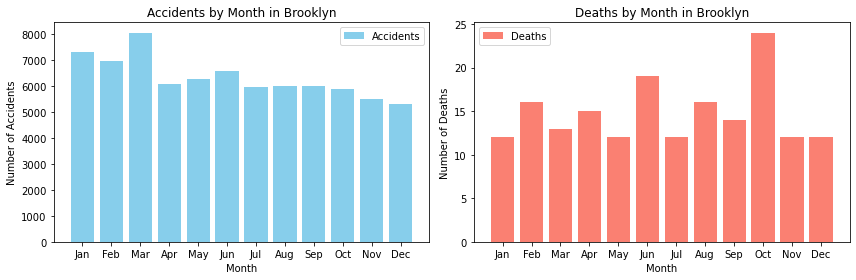

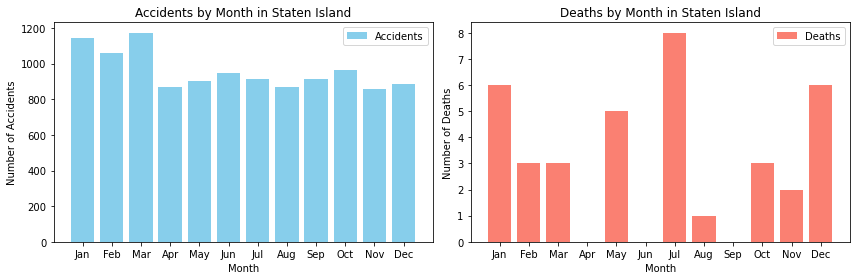

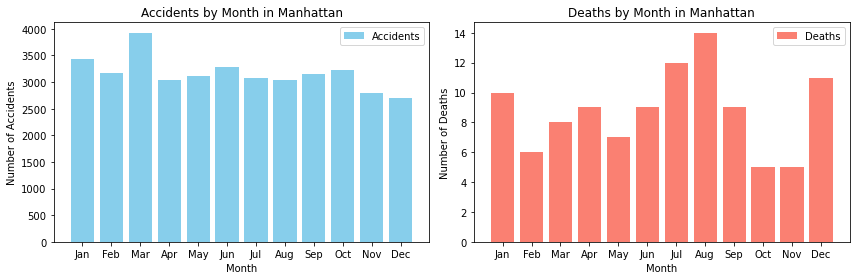

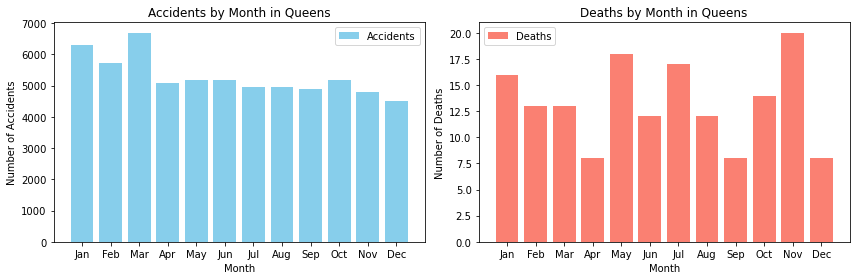

In [33]:
import calendar

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Create new columns for month and year
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by borough and month, count the number of accidents and sum the deaths
borough_monthly_data = df.groupby(['Borough', 'Month']).agg({'Collision ID': 'count', 'Persons Killed': 'sum'}).reset_index()

# Plotting bar charts for accidents and deaths by borough and month
boroughs = df['Borough'].unique()

for borough in boroughs:
    borough_data = borough_monthly_data[borough_monthly_data['Borough'] == borough]
    
    plt.figure(figsize=(12, 4))
    
    # Plotting accidents
    plt.subplot(1, 2, 1)
    plt.bar(borough_data['Month'], borough_data['Collision ID'], color='skyblue', label='Accidents')
    plt.title(f'Accidents by Month in {borough}')
    plt.xlabel('Month')
    plt.ylabel('Number of Accidents')
    plt.xticks(range(1, 13), calendar.month_abbr[1:])
    plt.legend()
    
    # Plotting deaths
    plt.subplot(1, 2, 2)
    plt.bar(borough_data['Month'], borough_data['Persons Killed'], color='salmon', label='Deaths')
    plt.title(f'Deaths by Month in {borough}')
    plt.xlabel('Month')
    plt.ylabel('Number of Deaths')
    plt.xticks(range(1, 13), calendar.month_abbr[1:])
    plt.legend()
    
    plt.tight_layout()
    plt.show()

The collision patterns exhibit consistency across all boroughs, with the initial three months recording a high number of accidents followed by a sudden decrease. This is because, January and February are attributed to heavy snowfall. However, December, also experiencing snow, surprisingly reports fewer accidents. In terms of fatalities, each borough demonstrates distinct dynamics. When comparing the ratio of deaths to accidents, it is significantly low, indicating that despite accidents, fatalities are comparatively rare occurrences across the boroughs.


Analysis based on location

In [46]:
#Identifying High-Risk Locations: Unveiling the Top 3 Ranks for Locations within Each Borough with the Highest Collision Counts

In [45]:
top_locations = df.groupby(['Borough', 'Street Name']).size().reset_index(name='Collision Count')
top_locations = top_locations.sort_values(by=['Borough', 'Collision Count'], ascending=[True, False])
top_locations['Rank'] = top_locations.groupby('Borough').cumcount() + 1

# Get top 3 locations for each borough
top3_locations = top_locations[top_locations['Rank'] <= 3]

from tabulate import tabulate
table_data = top3_locations.loc[:, ['Rank', 'Borough', 'Street Name', 'Collision Count']]
table_format = tabulate(table_data, headers='keys', tablefmt='fancy_grid')
print(table_format)

╒══════╤════════╤═══════════════╤════════════════════════════╤═══════════════════╕
│      │   Rank │ Borough       │ Street Name                │   Collision Count │
╞══════╪════════╪═══════════════╪════════════════════════════╪═══════════════════╡
│  655 │      1 │ Bronx         │ Major Deegan Expressway    │              1296 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│  120 │      2 │ Bronx         │ Bruckner Boulevard         │              1280 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│  211 │      3 │ Bronx         │ Cross Bronx Expy           │              1144 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│ 1408 │      1 │ Brooklyn      │ Belt Parkway               │              2295 │
├──────┼────────┼───────────────┼────────────────────────────┼───────────────────┤
│ 1315 │      2 │ Brooklyn      │ Atlantic Avenue            │              1899 │
├───

In [49]:
#Exploring Spatial Patterns: Assessing the Correlation Between Latitude/Longitude and Injury Counts in Collision Incidents

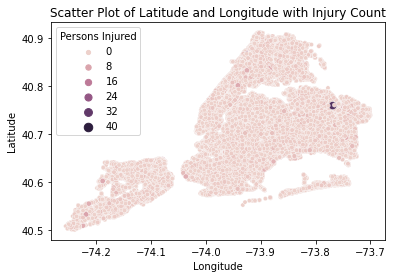

Correlation Coefficient: -0.012851924358581526


In [29]:
sns.scatterplot(x='Longitude', y='Latitude', hue='Persons Injured', size='Persons Injured', data=df)
plt.title('Scatter Plot of Latitude and Longitude with Injury Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Calculate correlation coefficient
correlation_coefficient = df['Latitude'].corr(df['Persons Injured'])
print(f'Correlation Coefficient: {correlation_coefficient}')

Analysis based on contribution factor

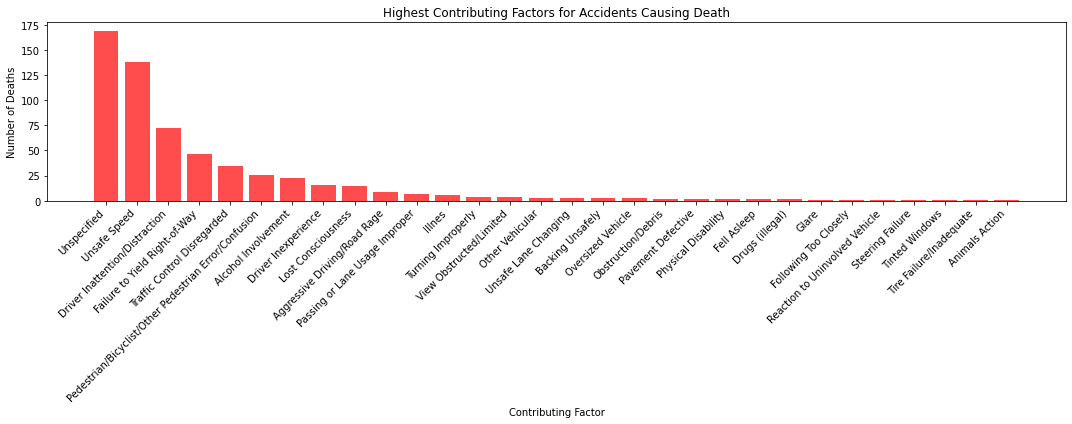

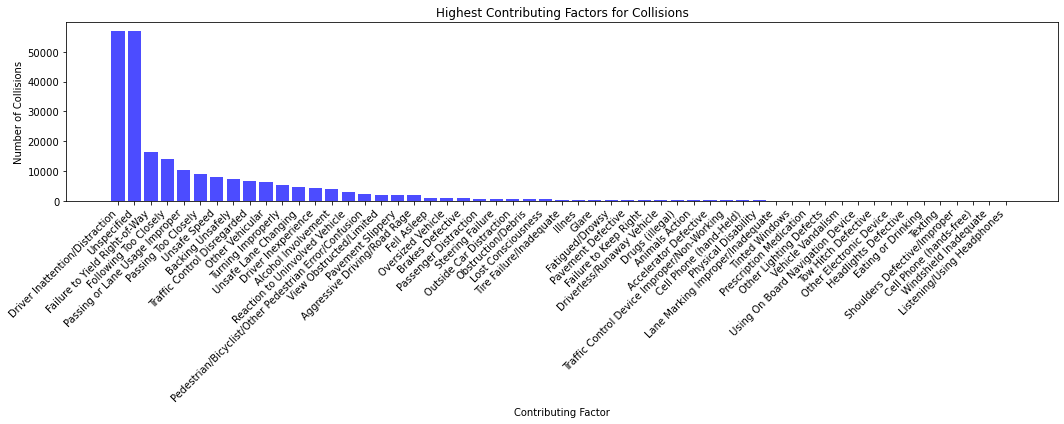

In [58]:
death_data = df[df['Persons Killed'] > 0]

# Group by contributing factors and sum the number of deaths
death_factors = death_data.groupby('Contributing Factor')['Persons Killed'].sum().reset_index()

death_factors = death_factors.sort_values(by='Persons Killed', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(death_factors['Contributing Factor'], death_factors['Persons Killed'], color='red', alpha=0.7)
plt.title('Highest Contributing Factors for Accidents Causing Death')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

collision_factors = df['Contributing Factor'].value_counts().reset_index()
collision_factors.columns = ['Contributing Factor', 'Number of Collisions']

collision_factors = collision_factors.sort_values(by='Number of Collisions', ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
plt.bar(collision_factors['Contributing Factor'], collision_factors['Number of Collisions'], color='blue', alpha=0.7)
plt.title('Highest Contributing Factors for Collisions')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

It appears that a significant number of collisions stem from driver inattention; surprisingly, the fatality rate associated with this cause is relatively low. Collisions attributed to speeding, while moderate in frequency, exhibit a notably high fatality rate. Interestingly, issues like following too closely and failure to yield the right of way result in many collisions after instances of driver inattention.

In [60]:
#Detailed Analysis
#In manhattan, for vehicle type bus, motorcycle and passenger vehicle which contribustion factors affect most

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12332\3433012042.py:44: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Tilt x-axis labels


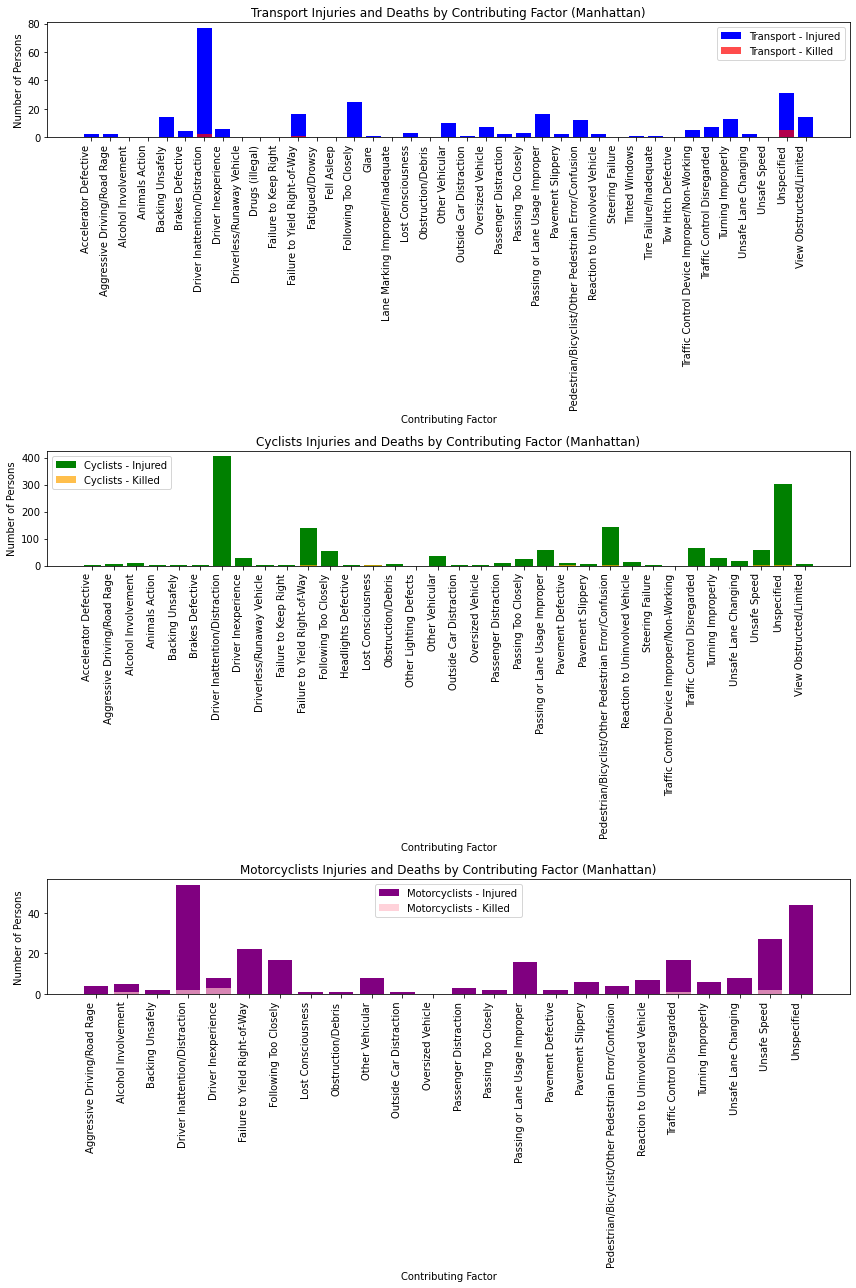

In [56]:
# Assuming 'Contributing Factor', 'Persons Injured', 'Persons Killed', 'Vehicle Type' are column names in your DataFrame
manhattan_data = df[df['Borough'] == 'Manhattan']

# Filter data for pedestrians, motorcyclists, and cyclists
Transport_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Transport']
motorcyclist_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Motorcycle']
cyclist_data = manhattan_data[manhattan_data['Vehicle Type'] == 'Bicycle']

# Group by contributing factors and sum injuries and deaths
Transport_factors = Transport_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()
motorcyclist_factors = motorcyclist_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()
cyclist_factors = cyclist_data.groupby('Contributing Factor')[['Persons Injured', 'Persons Killed']].sum().reset_index()

# Create separate bar charts for each group
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# Plot for Transport
axs[0].bar(Transport_factors['Contributing Factor'], Transport_factors['Persons Injured'], color='blue', label='Transport - Injured')
axs[0].bar(Transport_factors['Contributing Factor'], Transport_factors['Persons Killed'], color='red', label='Transport - Killed', alpha=0.7)
axs[0].set_title('Transport Injuries and Deaths by Contributing Factor (Manhattan)')
axs[0].set_xlabel('Contributing Factor')
axs[0].set_ylabel('Number of Persons')

axs[0].legend()

# Plot for Cyclists
axs[1].bar(cyclist_factors['Contributing Factor'], cyclist_factors['Persons Injured'], color='green', label='Cyclists - Injured')
axs[1].bar(cyclist_factors['Contributing Factor'], cyclist_factors['Persons Killed'], color='orange', label='Cyclists - Killed', alpha=0.7)
axs[1].set_title('Cyclists Injuries and Deaths by Contributing Factor (Manhattan)')
axs[1].set_xlabel('Contributing Factor')
axs[1].set_ylabel('Number of Persons')
axs[1].legend()

# Plot for Motorcyclists
axs[2].bar(motorcyclist_factors['Contributing Factor'], motorcyclist_factors['Persons Injured'], color='purple', label='Motorcyclists - Injured')
axs[2].bar(motorcyclist_factors['Contributing Factor'], motorcyclist_factors['Persons Killed'], color='pink', label='Motorcyclists - Killed', alpha=0.7)
axs[2].set_title('Motorcyclists Injuries and Deaths by Contributing Factor (Manhattan)')
axs[2].set_xlabel('Contributing Factor')
axs[2].set_ylabel('Number of Persons')
axs[2].legend()

plt.tight_layout()
for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')  # Tilt x-axis labels
    
# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In Manhattan, there's a notable disparity in injury rates, with cyclists facing a significantly higher risk of injuries compared to those using other modes of transportation like public transport or motorcycles.



In [ ]:
#Top 5 contributing factors for fatal accidents accross each borough

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_15652\725334058.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')


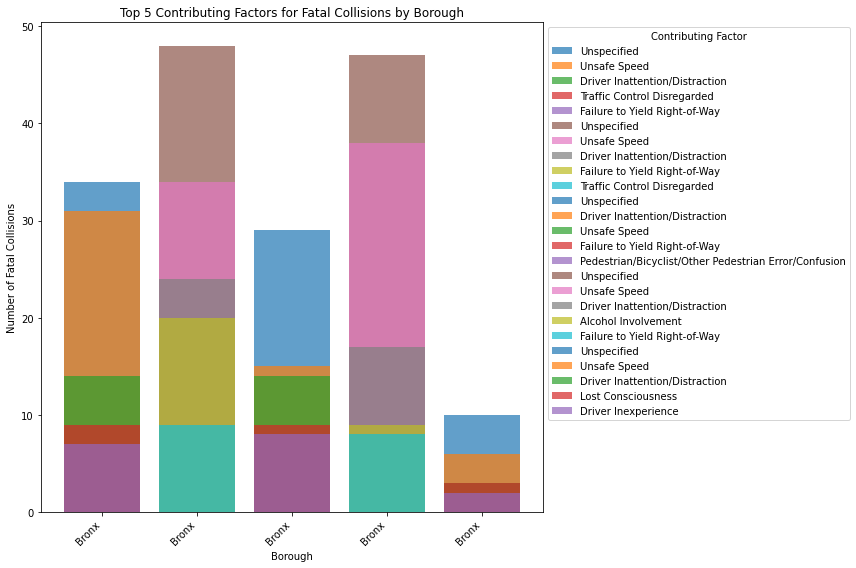

In [41]:
fatal_collisions = df[df['Persons Killed'] > 0]

# Group by borough and contributing factor, and count the occurrences
borough_contributions = fatal_collisions.groupby(['Borough', 'Contributing Factor']).size().reset_index(name='Number of Fatal Collisions')

# Find the top 5 contributing factors for each borough
top_factors_by_borough = borough_contributions.groupby('Borough').apply(lambda x: x.nlargest(5, 'Number of Fatal Collisions')).reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))

for index, row in top_factors_by_borough.iterrows():
    ax.bar(row['Borough'], row['Number of Fatal Collisions'], label=row['Contributing Factor'], alpha=0.7)

ax.set_title('Top 5 Contributing Factors for Fatal Collisions by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Fatal Collisions')
ax.legend(title='Contributing Factor', bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
 #the top contributing factor for fatal collisions in each borough

C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12332\3218376029.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_factors_by_borough = borough_contributions.groupby('Borough')['Number of Fatal Collisions', 'Contributing Factor'].max().reset_index()
C:\Users\Shrushti\AppData\Local\Temp\ipykernel_12332\3218376029.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')


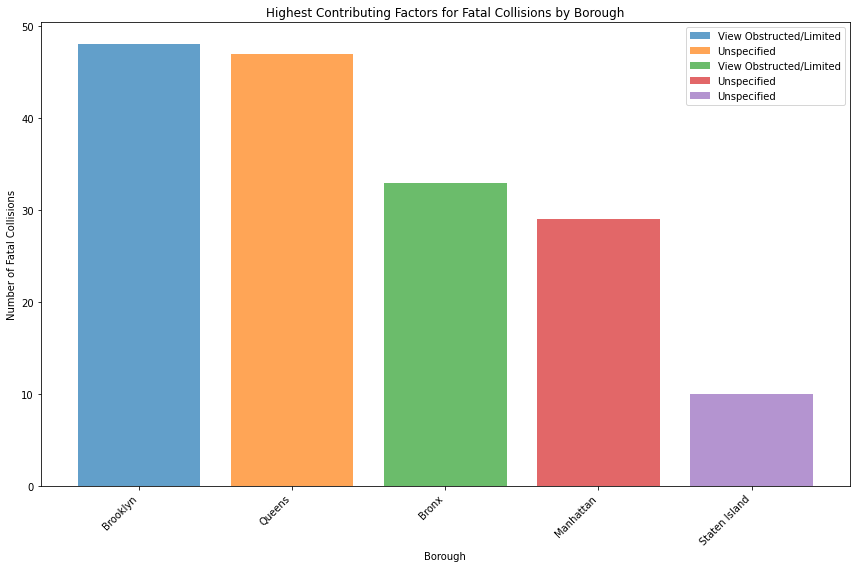

In [48]:
fatal_collisions = df[df['Persons Killed'] > 0]

# Group by borough and contributing factor, and count the occurrences
borough_contributions = fatal_collisions.groupby(['Borough', 'Contributing Factor']).size().reset_index(name='Number of Fatal Collisions')

# Find the most common contributing factor for each borough
top_factors_by_borough = borough_contributions.groupby('Borough')['Number of Fatal Collisions', 'Contributing Factor'].max().reset_index()

# Sort the data by the number of fatal collisions in descending order
top_factors_by_borough = top_factors_by_borough.sort_values(by='Number of Fatal Collisions', ascending=False)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through the rows of the DataFrame to plot bars
for index, row in top_factors_by_borough.iterrows():
    ax.bar(row['Borough'], row['Number of Fatal Collisions'], label=row['Contributing Factor'], alpha=0.7)

# Add labels, title, legend, and adjust layout
ax.set_title('Highest Contributing Factors for Fatal Collisions by Borough')
ax.set_xlabel('Borough')
ax.set_ylabel('Number of Fatal Collisions')
ax.legend()
ax.set_xticklabels(top_factors_by_borough['Borough'], rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
#distribution of collision accross borough

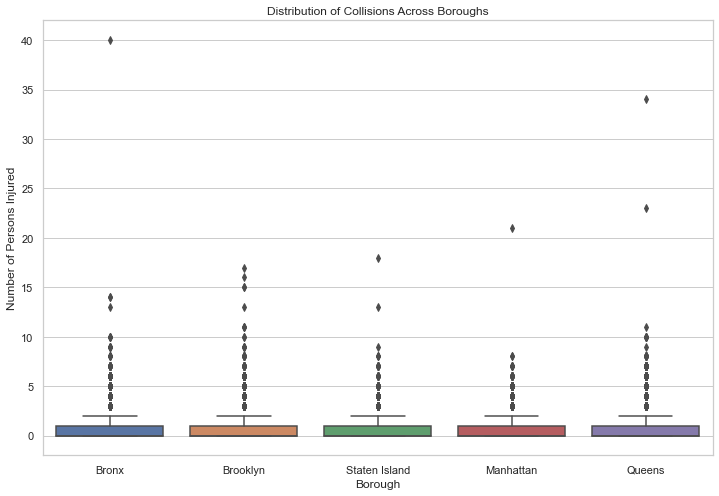

In [42]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create a boxplot to visualize the distribution of collisions across boroughs
sns.boxplot(x='Borough', y='Persons Injured', data=df)
plt.title('Distribution of Collisions Across Boroughs')
plt.xlabel('Borough')
plt.ylabel('Number of Persons Injured')
plt.show()
